#1.단항 논리 회기 실습

* 논리회귀 (Logistic Regrssion)
* 분류를 할 때 사용하며 선형 회귀 공식으로부터 나왔기 때문에  논리 회귀라는 이름을 붙여짐

![](https://i.imgur.com/nE29yVL.png)
> 직선 하나(선형회귀)를 사용해서 예측한다면 제대로 예측할 수 없음(정확도가 떨어짐)

![](https://i.imgur.com/guvMfkf.png)
>Sigmoid 함수(Logistic 함수)를 사용하여 정확도를 높임

### Sigmosid 함수
-  예측값을 0에서 1사이 값이 되도록 만듬
* 0에서 1사이의 연속된 값을 출력으로 하기 때문에 보통 0.5를 기준으로 구분






In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


torch.manual_seed(10)

In [7]:
X_train = torch.FloatTensor([[0],[1],[3],[5],[9],[11],[15],[20]])
y_train = torch.FloatTensor([[0],[0],[0],[0],[0],[1],[1],[1]])

print(X_train.shape)
print(y_train.shape)

torch.Size([8, 1])
torch.Size([8, 1])


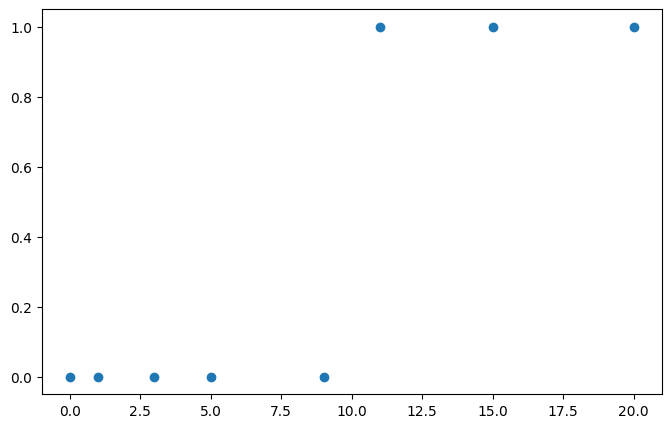

In [6]:
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train)

![](https://i.imgur.com/6NsfKMa.png)

In [10]:
#Sequential 합쳐주는애
model = nn.Sequential(
    nn.Linear(1,1),
    nn.Sigmoid()
)

print(model)

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Sigmoid()
)


In [11]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.3750]], requires_grad=True), Parameter containing:
tensor([0.2300], requires_grad=True)]


### 비용 함수
* 논리 회귀에서는 nn.BCELoss() 함수를 사용하여 Loss를 계산
* Binary Cross Entropy(BCE)

<img src="https://i.imgur.com/tvCuEmh.png" width="600px">

In [13]:
y_pred = model(X_train)
y_pred

tensor([[0.5573],
        [0.4638],
        [0.2901],
        [0.1618],
        [0.0413],
        [0.0199],
        [0.0045],
        [0.0007]], grad_fn=<SigmoidBackward0>)

In [15]:
loss = nn.BCELoss()(y_pred, y_train)
loss

tensor(2.3231, grad_fn=<BinaryCrossEntropyBackward0>)

In [16]:
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [17]:
# 학습(Training) (반복 훈련을 해야한다!)
# 반복 훈련을 하면서 틀린 W,b를 수정하여 오차를 계속 줄여나감
# epochs: 반복 훈련 횟수
epochs = 10000

for epoch in range(epochs + 1):

  y_pred = model(X_train)
  loss = nn.BCELoss()(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f'Epoch {epoch}/{epoch} Loss: {loss:.6f}')

Epoch 0/0 Loss: 2.323089
Epoch 100/100 Loss: 0.632172
Epoch 200/200 Loss: 0.572246
Epoch 300/300 Loss: 0.522739
Epoch 400/400 Loss: 0.481642
Epoch 500/500 Loss: 0.447285
Epoch 600/600 Loss: 0.418326
Epoch 700/700 Loss: 0.393705
Epoch 800/800 Loss: 0.372588
Epoch 900/900 Loss: 0.354323
Epoch 1000/1000 Loss: 0.338396


In [18]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.2051]], requires_grad=True), Parameter containing:
tensor([-1.5890], requires_grad=True)]


In [19]:
X_test = torch.FloatTensor([[2.5],[15.5]])
y_pred = model(X_test)
print(y_pred)

tensor([[0.2542],
        [0.8306]], grad_fn=<SigmoidBackward0>)


In [20]:
# 임계치 설정하기
# 0.5보다 크거나 같드면 1
# 0.5보다 작으면 0

y_bool = (y_pred >= 0.5).float()
print(y_bool)


tensor([[0.],
        [1.]])


#2.다항 논리 회귀 실습

In [26]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [0, 0, 0, 1, 1, 1, 2, 2]

x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

print(x_train)
print(y_train)

tensor([[1., 2., 1., 1.],
        [2., 1., 3., 2.],
        [3., 1., 3., 4.],
        [4., 1., 5., 5.],
        [1., 7., 5., 5.],
        [1., 2., 5., 6.],
        [1., 6., 6., 6.],
        [1., 7., 7., 7.]])
tensor([0, 0, 0, 1, 1, 1, 2, 2])


In [27]:
model = nn.Sequential(
    nn.Linear(4,3)
)

print(model)

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
)


In [28]:
y_pred = model(x_train)
print(y_pred)

tensor([[-0.6350, -2.0035, -0.6938],
        [-1.9066, -3.2743,  0.0694],
        [-2.7725, -4.4818,  0.2317],
        [-4.0920, -6.2419,  0.5258],
        [-4.3696, -7.8276, -0.9355],
        [-4.5614, -5.7601,  1.7164],
        [-5.1954, -8.1828,  0.0594],
        [-6.1171, -9.5165,  0.1162]], grad_fn=<AddmmBackward0>)


In [29]:
# 다항 논리 회귀에서는 BCELoss() 대신 CrossEntropyLoss()을 사용
# 소프트맥스 함수가 포함 되어 있다. ( 클래스의 갯수 만큼 확률을 내뿜어주는 함수)
loss = nn.CrossEntropyLoss()(y_pred, y_train)
print(loss)

tensor(3.3968, grad_fn=<NllLossBackward0>)


In [30]:
optimizer = optim.SGD(model.parameters(),lr=0.1)

In [33]:
# 학습(Training) (반복 훈련을 해야한다!)
# 반복 훈련을 하면서 틀린 W,b를 수정하여 오차를 계속 줄여나감
# epochs: 반복 훈련 횟수
epochs = 1000

for epoch in range(epochs + 1):

  y_pred = model(x_train)
  loss = nn.CrossEntropyLoss()(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f'Epoch {epoch}/{epoch} Loss: {loss:.6f}')

Epoch 0/0 Loss: 3.396825
Epoch 100/100 Loss: 0.626830
Epoch 200/200 Loss: 0.552412
Epoch 300/300 Loss: 0.500536
Epoch 400/400 Loss: 0.457238
Epoch 500/500 Loss: 0.418278
Epoch 600/600 Loss: 0.381568
Epoch 700/700 Loss: 0.345692
Epoch 800/800 Loss: 0.309562
Epoch 900/900 Loss: 0.272979
Epoch 1000/1000 Loss: 0.243904
Epoch 1100/1100 Loss: 0.230832
Epoch 1200/1200 Loss: 0.219727
Epoch 1300/1300 Loss: 0.209606
Epoch 1400/1400 Loss: 0.200343
Epoch 1500/1500 Loss: 0.191834
Epoch 1600/1600 Loss: 0.183991
Epoch 1700/1700 Loss: 0.176741
Epoch 1800/1800 Loss: 0.170018
Epoch 1900/1900 Loss: 0.163770
Epoch 2000/2000 Loss: 0.157949
Epoch 2100/2100 Loss: 0.152512
Epoch 2200/2200 Loss: 0.147425
Epoch 2300/2300 Loss: 0.142654
Epoch 2400/2400 Loss: 0.138173
Epoch 2500/2500 Loss: 0.133955
Epoch 2600/2600 Loss: 0.129980
Epoch 2700/2700 Loss: 0.126226
Epoch 2800/2800 Loss: 0.122677
Epoch 2900/2900 Loss: 0.119316
Epoch 3000/3000 Loss: 0.116129
Epoch 3100/3100 Loss: 0.113103
Epoch 3200/3200 Loss: 0.110226
E

In [34]:
x_test = torch.FloatTensor([[1,2,5,6]])
y_pred = model(x_test)
print(y_pred)

tensor([[-13.0688,   3.8409,   0.6225]], grad_fn=<AddmmBackward0>)


In [36]:
# 예측값과 확률 구하기
#Softmax(차원)
y_prob = nn.Softmax(1)(y_pred)
y_prob

tensor([[4.3565e-08, 9.6152e-01, 3.8477e-02]], grad_fn=<SoftmaxBackward0>)

In [37]:
print(f'0일 확률: {y_prob[0][0]:.2f}')
print(f'1일 확률: {y_prob[0][1]:.2f}')
print(f'2일 확률: {y_prob[0][2]:.2f}')

0일 확률: 0.00
1일 확률: 0.96
2일 확률: 0.04


In [38]:
torch.argmax(y_prob, axis=1)

tensor([1])